# Splat Analysis by means Computer Vision

Se va a realizar un estudio y analisis de una splat utilizando tecnicas de Imagen processing y vision por computadora. para ellos se utilizará una gerramienta como python asi como distintas bibliotecas de procesamiento de imagenes como OpenCV y scikit image


## Import packages and parse arguments

Los paquetes que se utilizaran son:

1. `sys`: The sys module provides functions and variables used to manipulate different parts of the Python runtime environment (for example, the list of arguments passed to a command line). https://docs.python.org/3/library/sys.html.
2. `arparse`: The argparse module makes it easy to write user-friendly command-line interfaces. The program defines what arguments it requires, and argparse will figure out how to parse those out of sys.argv. The argparse module also automatically generates help and usage messages and issues errors when users give the program invalid arguments. https://docs.python.org/3/library/argparse.html

In [17]:
# import the necessary packages
import sys, argparse

import cv2
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", default="images/650 12H 1  006.png",
	help="path to input image")
ap.add_argument("-c", "--connectivity", type=int, default=8,
	help="connectivity for connected component analysis")
# Before calling parser.parse_args(), all required flag should be False.
sys.argv = ['-f']
args = vars(ap.parse_args())


(rows,cols,channels)=(768, 1024, 3)


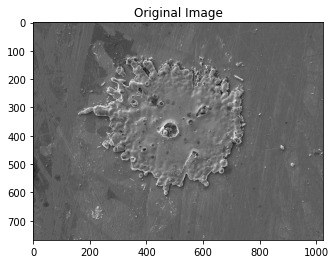

In [18]:
# START:

# Reading
img = cv2.imread(args["image"])
rows,cols,ch = img.shape
print('(rows,cols,channels)={}'.format(img.shape))
plt.title('Original Image')
plt.imshow(img)
plt.show()

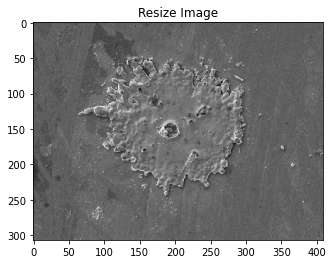

In [19]:
# Resizing
img_res = cv2.resize(
	img,
	(int(cols*0.4), int(rows*0.4)),
	interpolation = cv2.INTER_NEAREST
)
plt.title('Resize Image')
plt.imshow(img_res)
plt.savefig('images/Resize Image.png')
plt.show()

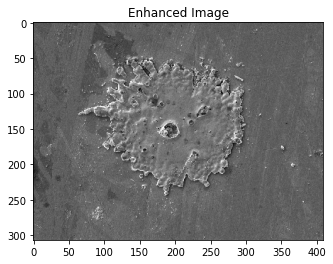

In [20]:
# Adjust Contrast 1%
# Image brightness enhancer
# Notice the COLOR_BGR2RGB which means that the color is
# converted from BGR to RGB
img_con = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)
img_pil = Image.fromarray(img_con)
#img_pil.show()

enhancer = ImageEnhance.Contrast(img_pil)

factor = 1.1 #gives original image
img_pil_enh = enhancer.enhance(factor)
img_enh = np.asarray(img_pil_enh)

plt.title('Enhanced Image')
plt.imshow(img_enh)
plt.savefig('images/Enhanced Image.png')
plt.show()

# # or
# img_enh2 = (((img_res - img_res.min()) / (img_res.max() - img_res.min())) **
#            1) * (0.95 - 0.05) + 0.05
#
# plt.title('Enhaced Image 2')
# plt.imshow(img_enh2)
# plt.show()


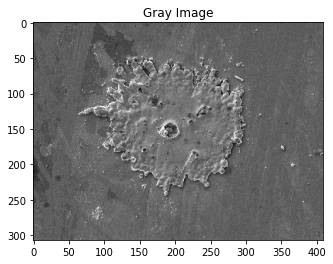

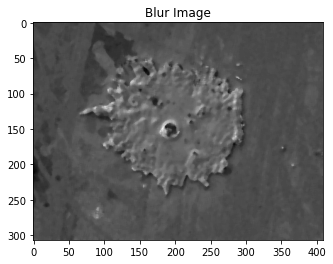

In [21]:
# Thresholding
#
img_gray = cv2.cvtColor(img_enh, cv2.COLOR_RGB2GRAY)
plt.title('Gray Image')
plt.imshow(img_gray, cmap = 'gray')
plt.savefig('images/Gray Image.png')
plt.show()

img_blur = cv2.medianBlur(img_gray, 5)

plt.title('Blur Image')
plt.imshow(img_blur, cmap = 'gray')
plt.savefig('images/Blur Image.png')
plt.show()

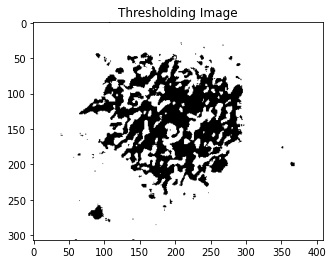

In [22]:
# img_thr = cv2.adaptiveThreshold(
#	img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

#img_thr = cv2.adaptiveThreshold(
#	img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV
#	|cv2.THRESH_BINARY, 11, 2)

img_thr = cv2.threshold(img_blur, 0, 256,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

plt.title('Thresholding Image')
plt.imshow(img_thr, cmap = 'gray')
plt.savefig('images/Thesholding Image.png')
plt.show()

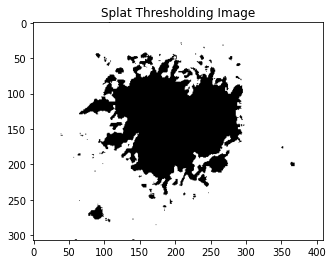

In [23]:
# Connected Components
# Applying cv2.connectedComponents()
output = cv2.connectedComponentsWithStats(img_thr)

# apply connected component analysis to the thresholded image
output = cv2.connectedComponentsWithStats(
	img_thr, args["connectivity"], cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

# The cv2.connectedComponentsWithStats then returns a 4-tuple of:
#
# 1. numLabels: The total number of unique labels (i.e., number of total
# components) that were detected

# 2. labels: A mask named labels has the same spatial dimensions as our input
# thresh image. For each location in labels, we have an integer ID value that
# corresponds to the connected component where the pixel belongs. You’ll
# learn how to filter the labels matrix later in this section.

# 3. stats: Statistics on each connected component, including the bounding
# box coordinates and area (in pixels).

# 4. centroids (i.e., center): (x, y)-coordinates of each connected
# component.

# We only want the label (object) with max area (no background or label 0)
splatArea = stats[1:numLabels, cv2.CC_STAT_AREA].max()
splatLabel = np.argmax(stats[0:numLabels, 4] == splatArea)

img_thr_splat = (labels == splatLabel).astype("uint8") * 255
plt.title('Splat Thresholding Image')
plt.imshow(img_thr_splat, cmap = 'gray')
plt.savefig('images/Splat Thresholding Image.png')
plt.show()


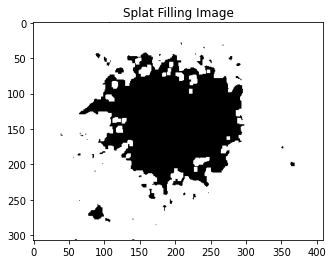

In [24]:
# Morphology

# kernel = np.ones((5,5),np.uint8)

# We manually created a structuring elements with help of Numpy. It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.
#   Rectangular Kernel  cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
#   Elliptical Kernel   cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#   Cross-shaped Kernel cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))


# erosion = cv2.erode(img,kernel,iterations = 1)
# dilation = cv2.dilate(img,kernel,iterations = 1)
# opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
# closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
# gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
# tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
# blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
#img_thr_splat = cv2.erode(img_thr_splat,kernel,cv2.BORDER_REFLECT, iterations = 100)

imgClosing = cv2.morphologyEx(img_thr_splat, cv2.MORPH_OPEN, kernel,iterations = 1)
plt.title('Splat Filling Image')
plt.imshow(imgClosing, cmap = 'gray')
plt.savefig('images/Splat Filling Image.png')
plt.show()


##################
External Contour
##################
Area External: 124840.0
Perimeter External: 1430.4852812290192
Convexity External: False
Equivalent Diameter External: 398.6868755862647

##################
Internal Contour
##################
Area Internal: 2.0
Perimeter Internal: 5.656854152679443
Convexity Internal: True
Equivalent Diameter Internal: 1.5957691216057308

##################
Internal Contour
##################
Area Internal: 4.0
Perimeter Internal: 7.656854152679443
Convexity Internal: True
Equivalent Diameter Internal: 2.256758334191025

##################
Internal Contour
##################
Area Internal: 34.5
Perimeter Internal: 24.727921843528748
Convexity Internal: False
Equivalent Diameter Internal: 6.627726932618989

##################
Internal Contour
##################
Area Internal: 26.5
Perimeter Internal: 24.727921843528748
Convexity Internal: False
Equivalent Diameter Internal: 5.808687281605183

##################
Internal Contour
##################


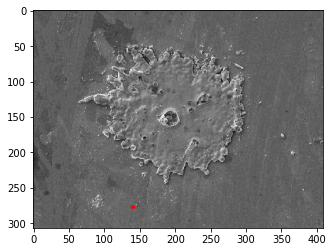

In [25]:
# Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

        # For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
        # findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables.
        # In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

contours, hierarchy = cv2.findContours(imgClosing,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)

# RETR_LIST It simply retrieves all the contours, but doesn’t create any
# parent-child relationship. Parents and kids are equal under this rule,
# and they are just contours. ie they all belongs to same hierarchy level.

# RETR_EXTERNAL If you use this flag, it returns only extreme outer flags.
# All child contours are left behind. We can say, under this law, Only the
# eldest in every family is taken care of. It doesn’t care about other
# members of the family :).

# RETR_CCOMP This flag retrieves all the contours and arranges them to a
# 2-level hierarchy. ie external contours of the object (ie its boundary) are
# placed in hierarchy-1. And the contours of holes inside object (if any) is
# placed in hierarchy-2. If any object inside it, its contour is placed again
# in hierarchy-1 only. And its hole in hierarchy-2 and so on.

# RETR_TREE And this is the final guy, Mr.Perfect. It retrieves all the
# contours and creates a full family hierarchy list. It even tells, who is
# the grandpa, father, son, grandson and even beyond... :).


green = (0,255,0)
red = (255,0,0)
M = []    # List Moments
A = []    # List Areas
P = []    # List Perimeters
K = []    # List Convexity
AR = []   # List Aspect Ratio
E = []    # List Extent
S = []    # List Solidity
ED = []   # List Equivalent Diameter
O = []    # List Ellipse Orientation

for i in range(len(contours)):
	if i == 0:
		color = green
		cont = "External"
	else:
		color = red
		cont = "Internal"
	cnt = contours[i]
	Mo = cv2.moments(cnt)
	M.append(Mo)
	# print(len(contours))
	print("\n##################")
	print("{} Contour".format(cont))
	print("##################")

	##############
	#  FEATURES  #
	##############

	# Centroid
	cx = int(M[i]['m10']/M[i]['m00'])
	cy = int(M[i]['m01']/M[i]['m00'])

	# Area
	area = cv2.contourArea(cnt)
	A.append(area)
	print("Area {}: {}".format(cont, A[i]))

	# Perimeters
	perimeter = cv2.arcLength(cnt, True)
	P.append(perimeter)
	print("Perimeter {}: {}".format(cont, P[i]))

	# Convexity
	k = cv2.isContourConvex(cnt)
	K.append(k)
	print("Convexity {}: {}".format(cont, K[i]))

	# Equivalent Diameter
	equi_diameter = np.sqrt(4*area/np.pi)
	ED.append(equi_diameter)
	print("Equivalent Diameter {}: {}".format(cont, ED[i]))

	# Draw Contours
	#cv2.drawContours(img_res, [cnt], 0, color, 2)
	cv2.drawContours(img_res, [contours[2]], 0, color, 2)
    
    
    
plt.imshow(img_res)
plt.show()



In [26]:
	# Draw Approx Polygone (if epsilon = 0 draw a perfect contour)
	epsilon = 0.009*cv2.arcLength(cnt, True)
	approx = cv2.approxPolyDP(cnt, epsilon, True)
	cv2.drawContours(img_res, [approx], 0, color, 2)

	# Draw Convex Hull calculate Solidity
	# In geometry, the convex hull or convex envelope or convex closure of a
	# shape is the smallest convex set that contains it.
	hull = cv2.convexHull(cnt)
	cv2.drawContours(img_res, [hull], 0, color, 2)
		# Solidity
	hull_area = cv2.contourArea(hull)
	solidity = float(area) / hull_area
	S.append(solidity)
	print("Solidity {}: {}".format(cont, S[i]))

	# Axis-aligned Bounding Rectangle calculate Aspect ratio
	# Bounding Box
	# In geometry,the minimum or smallest bounding or enclosing box for a point
	# set (S) in N dimensions is the box with the smallest measure (area,
	# volume,or hypervolume in higher dimensions) within which all the points
	# lie.
	x, y, w, h = cv2.boundingRect(cnt)
	cv2.rectangle(img_res, (x, y), (x+w, y+h), color, 2)
		# Aspect Ratio
	aspect_ratio = float(w) / h
	AR.append(aspect_ratio)
	print("Aspect Ratio {}: {}".format(cont, AR[i]))
		# Extent
	rect_area = w * h
	extent = float(area) / rect_area
	E.append(extent)
	print("Extent {}: {}".format(cont, E[i]))

	# Arbitrarily oriented Bounding Rectangle (minArea)
	rect = cv2.minAreaRect(cnt)
	box = cv2.boxPoints(rect)
	box = np.int0(box)
	cv2.drawContours(img_res, [box], 0, color, 2)

	# Minimum Enclosing Circle
	(x,y),radius = cv2.minEnclosingCircle(cnt)
	center = (int(x),int(y))
	radius = int(radius)
	cv2.circle(img_res, center, radius, color, 2)

#	# Fitting an Ellipse
#	ellipse = cv2.fitEllipse(cnt)
#	cv2.ellipse(img_res, ellipse, color, 2)
#	O.append(ellipse[2])
#	print("Ellipse Orientation {}: {}".format(cont, ellipse[2]))

#	# Fitting a Line
#	rows,cols = img_res.shape[:2]
#	[vx, vy, x, y] = cv2.fitLine(cnt, cv2.DIST_L2, 0, 0.01, 0.01)
#	lefty = int((-x*vy/vx)+y)
#	righty = int(((cols-x)*vy/vx)+y)
#	cv2.line(img_res, (cols-1,righty), (0, lefty), color, 2)

#	# Mask and Pixel Points
#	mask = np.zeros(img_gray.shape,np.uint8)
#	cv2.drawContours(mask,[cnt],0,255,-1)
#	pixelpoints = np.transpose(np.nonzero(mask))
#	#pixelpoints = cv2.findNonZero(mask)

#	# Maximum Value, Minimum Value and their locations
#	min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img_gray, mask = mask)

#	# Mean Color or Mean Intensity
#	mean_val = cv2.mean(img_res, mask = mask)

#	# Extreme Points
#	leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
#	rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
#	topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
#	bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

plt.title('Original Image with Features')
plt.imshow(img_res)
plt.savefig('images/Original Image with Features.png')
plt.show()

IndexError: list index out of range